In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Importar el Data Set
dataSet = pd.read_csv("Social_Network_Ads.csv")

In [3]:
print(dataSet.head())
print("Filas y Columnas: ", dataSet.shape)

    User ID  Gender   Age  EstimatedSalary  Purchased
0  15624510    Male  19.0          19000.0          0
1  15810944    Male  35.0          20000.0          0
2  15668575  Female  26.0          43000.0          0
3  15603246  Female  27.0          57000.0          0
4  15804002    Male  19.0          76000.0          0
Filas y Columnas:  (400, 5)


In [4]:
X = dataSet.iloc[:, [2,3]].values
y = dataSet.iloc[:, 4].values

In [5]:
print("type(X): ", type(X), " X.shape: ", X.shape)
print("type(y): ", type(y), " y.shape: ", y.shape)

type(X):  <class 'numpy.ndarray'>  X.shape:  (400, 2)
type(y):  <class 'numpy.ndarray'>  y.shape:  (400,)


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [7]:
#Mostrar Datos de Entrenamiento
from IPython.display import display, HTML

display(HTML("""
<h2 style = "color:2E86C1; font-family:Arial;">🧾 Datos de Train</h2>
"""))

tabla = {
    "X1_train (Age)": X_train[:, 0],
    "X2_train (Salary)": X_train[:, 1],
    "y_train (Purchased)": y_train
}
trainTable = pd.DataFrame(tabla)
print(trainTable.head())
print("Nueva Cantidad Filas: ", trainTable.shape[0])

   X1_train (Age)  X2_train (Salary)  y_train (Purchased)
0            44.0            39000.0                    0
1            32.0           120000.0                    1
2            38.0            50000.0                    0
3            32.0           135000.0                    1
4            52.0            21000.0                    1
Nueva Cantidad Filas:  300


In [8]:
#Mostrar Datos de Test
from IPython.display import display, HTML

display(HTML("""
<h2 style = "color:2E86C1; font-family:Arial;">🧾 Datos de Train</h2>
"""))

tabla = {
    "X1_test (Age)": X_test[:, 0],
    "X2_test (Salary)": X_test[:, 1],
    "y_test (Purchased)": y_test
}
trainTable = pd.DataFrame(tabla)
print(trainTable.head())
print("Nueva Cantidad Filas: ", trainTable.shape[0])

   X1_test (Age)  X2_test (Salary)  y_test (Purchased)
0           30.0           87000.0                   0
1           38.0           50000.0                   0
2           35.0           75000.0                   0
3           30.0           79000.0                   0
4           35.0           50000.0                   0
Nueva Cantidad Filas:  100


In [9]:
#Escalado de Variables
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [10]:
#Ajustar el modelo de Regresión Logística en Conjunto de Entrenamiento
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, class_weight='balanced')
classifier.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', random_state=0)

In [11]:
#Mostrar los Hiper Parametros
classifier.get_params()

{'C': 1.0,
 'class_weight': 'balanced',
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 0,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [12]:
#Visualizar el modelo de Regresion Logística que acabo de crear
from IPython.display import display, HTML

# Coeficientes del modelo de regresión logística
b0 = classifier.intercept_[0]
b1, b2 = classifier.coef_[0]

# Mostrar la función sigmoide de forma bonita
display(HTML(f"""
<div style="text-align:center; font-family:Arial; margin-top:20px;">
    <h3 style="color:#154360; background-color:#EAF2F8; display:inline-block; 
               padding:10px 20px; border-radius:10px;">
        P(y=1 | x1, x2) = 1 / (1 + exp(-({b0:.4f} + {b1:.4f}·x1 + {b2:.4f}·x2)))
    </h3>
</div>
"""))


In [13]:
#Prediccion de Resultados con el Conjunto de Testing
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1])

In [14]:
#Elaborar Matriz de Confusion
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [15]:
cm

array([[61,  7],
       [ 4, 28]])

In [16]:
pd.DataFrame(confusion_matrix(y_test, y_pred), columns = ["Pred: No", "Pred: Si"], index = ["Real: No", "Real: Si"])

,Pred: No,Pred: Si
Real: No,61,7
Real: Si,4,28


C:\Users\Usuario\AppData\Local\Temp\ipykernel_16684\2644306488.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


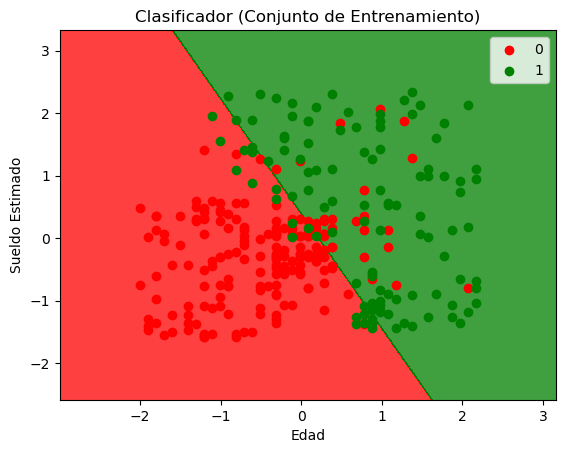

In [17]:
from matplotlib.colors import ListedColormap

X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Clasificador (Conjunto de Entrenamiento)')
plt.xlabel('Edad')
plt.ylabel('Sueldo Estimado')
plt.legend()
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_16684\3694920395.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


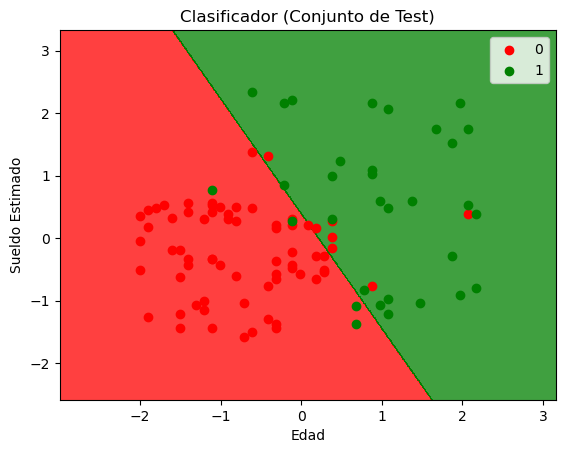

In [18]:
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Clasificador (Conjunto de Test)')
plt.xlabel('Edad')
plt.ylabel('Sueldo Estimado')
plt.legend()
plt.show()